In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

pi2 = 2*np.pi

from scipy.signal import butter, lfilter, freqz


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

32769 32769


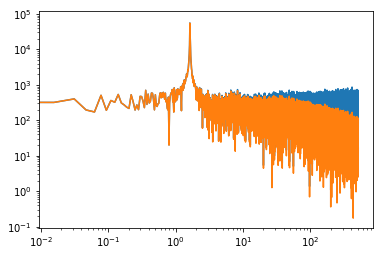

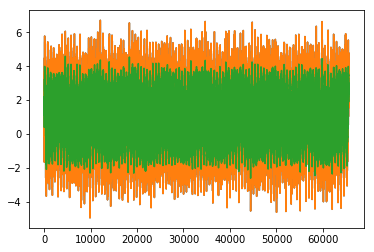

In [2]:
k=64
N = 1024*k
x = np.random.randn(N) + 2*np.sin(0.01*np.arange(N)) + 1

f = np.fft.rfft(x)

# f0=np.fft.fftshift(f)
af = np.abs(f)
freq = np.arange(np.size(af))/k

g=f*100/(100+freq)
# g=f *(freq<10)
ag=np.abs(g)


print(freq.size,f.size)
plt.figure()
plt.loglog(freq,af)
plt.loglog(freq,ag)


x0 = np.fft.irfft(f)
x1 = np.fft.irfft(g)

plt.figure()
plt.plot(x)
plt.plot(x0)
plt.plot(x1)


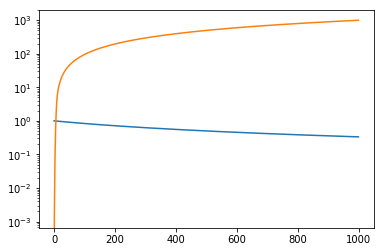

In [3]:
plt.figure()
x=np.arange(1000)
plt.semilogy(x,500/(500+x))
plt.semilogy(x,butter_lowpass_filter(x,cutoff=100,fs=1000))

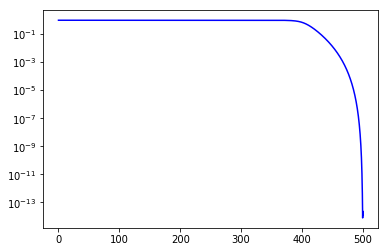

In [4]:
# Filter requirements.
order = 6
fs = 1000.0       # sample rate, Hz
cutoff = 400  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.figure()
# plt.subplot(2, 1, 1)
plt.semilogy(0.5*fs*w/np.pi, np.abs(h), 'b')

/home/sfuruset/miniconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


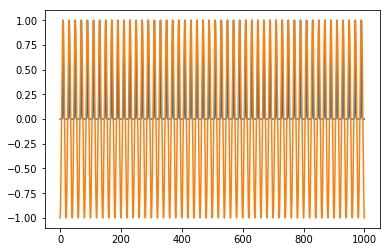

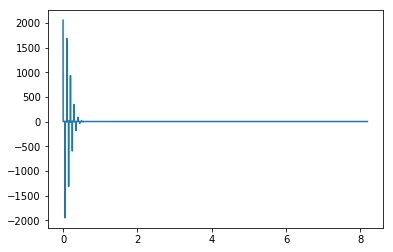

In [5]:
maxx=1000
N = 2048*8
x = np.linspace(0,maxx,N)
f = np.zeros_like(x)

start = 10
sep = 20
sig=1
var2 = 2*sig**2
nb = int(maxx/sep)
for b in range(nb):
#     if b==3: continue
    f += np.exp(-(x-start-b*sep)**2/var2)
    
    
plt.figure()
plt.plot(x,f)
# plt.plot(x,np.cos(pi2*(x-start)*0.05))
plt.plot(x,np.cos(pi2*(x-start)*.05))

plt.figure()
ft = np.fft.rfft(f)
freq = np.arange(np.size(ft))/np.size(ft) * N/maxx
freq = np.fft.rfftfreq(N,maxx/N)

plt.plot(freq,ft)



In [64]:
pi2

6.283185307179586